In [31]:
from google.colab import drive
import json
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




In [32]:
# Öppna JSON-filen och ladda in datan
file_path = '/content/drive/MyDrive/TIG326/K/K.json'
# Öppna JSON-filen och ladda in datan
with open(file_path) as f:
      data = json.load(f)


In [33]:
df = pd.read_json('/content/drive/MyDrive/TIG326/K/K.json')

IndexError: ignored

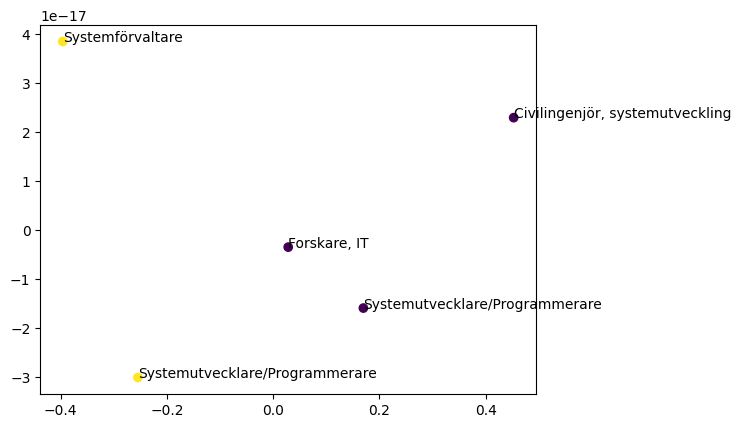

In [34]:
# Läs in JSON-filen med jobbtitlar och vektorer
with open('/content/drive/MyDrive/TIG326/K/K.json') as file:  # Uppdatera med rätt filnamn och sökväg
    data = json.load(file)

# Extrahera jobbtitlar och vektorer från JSON-data
jobbtitlar = [entry['occupation.label'] for entry in data]
#vektorer = np.array([entry['vektor'] for entry in data]) --> Carl data från 
vektorer = np.array([[0.2, 0.8],
                     [0.5, 0.5],
                     [0.8, 0.2],
                     [0.3, 0.7],
                     [0.6, 0.4]])

# Beräkna cosinuslikheten mellan vektorerna
cosine_sim = cosine_similarity(vektorer)

# Använd spectral clustering för att klustra jobbtitlarna
spectral = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)
labels = spectral.fit_predict(cosine_sim)

# Använd PCA för att reducera dimensionen till 2 för scatter plot
pca = PCA(n_components=2)
vektorer_reducerade = pca.fit_transform(vektorer)

# Plotta scatter plot av klusterresultaten
plt.scatter(vektorer_reducerade[:, 0], vektorer_reducerade[:, 1], c=labels)
for i, titel in enumerate(jobbtitlar):
    plt.annotate(titel, (vektorer_reducerade[i, 0], vektorer_reducerade[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Klustervisualisering med Spectral Clustering')
plt.show()